## MIS780 Advanced AI For Business - Assignment 1 - T2 2023

**Student Name:** _enter your full name here_ TELNA DALAS

**Student ID:** _enter your student ID here_ 222560322

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary



**Aim:**

The goal of this effort is to supply airlines with significant information gleaned from social media consumer emotions. By doing so, we hope to accomplish various advantages for both the company and its customers:

Enhanced Customer Experience: Using analysis of sentiment and topic modelling, we hope to identify customer pain spots and areas of concern. Addressing these concerns as soon as possible can result in a better overall customer experience, creating loyalty and a favourable brand reputation.

Tailored Marketing Strategies: Knowing where your customers are and what they want helps airlines to customise marketing efforts to specific locations and demographics.

Proactive Problem Solving: By using machine learning methods to forecast sentiment, airlines may detect negative emotions ahead of time. This proactive approach enables organisations to handle issues as they arise and avoid possible public relations disasters.

Strategic Decision-Making: Airlines obtain insights into market views by assessing their attractiveness and analysing sentiment proportions.

**Proposed approaches**


We used the following ways to handle the business challenge and achieve the mentioned benefits:

Ranking Popularity: We calculated airline popularity using tweet volumes. This method allows airlines to effectively allocate resources by focusing on the most visible ones.

Customer Location Analysis: Airlines can tailor marketing techniques to certain demographics by finding popular states wherever customers are situated.

Sentiment Prediction: We forecast sentiment using machine learning algorithms to allow proactive communication with clients, resulting in higher satisfaction.

Lexicon-Based Sentiment Analysis: For strategic decision-making, our lexicon-based technique quantifies positive and negative attitudes, allowing airline to focus on areas that require attention.

Topic Modelling: Using topic modelling, we were able to uncover frequently stated negative concerns, allowing airlines to prioritise fixes and increase customer happiness.

**Major findings**

Our investigation demonstrated the popularity of various airlines, assisting airlines in understanding their market position. Identifying consumer locations helps with personalised marketing and increases engagement. Predicting emotion allows airlines to address consumer complaints in advance, enhancing customer relationships. Lexicon-based analysis aids in strategic decision-making for enhanced consumer sentiment. Finally, topic modelling identifies and prioritises widespread negative concerns, allowing airlines to prioritise and solve them, hence improving total customer happiness.

It supplies airlines with practical findings that immediately solve the business problem through our complete techniques and results, enabling a customer-centric strategy and sustainable development.

<a id = "cell_exploration"></a>
### 2. Data Exploration


**Aim:**
This code explores data by presenting the initial rows of the dataset, displaying basic statistics, and producing a bar plot to visualise the popularity of aircraft according to the number of tweets. Depending on the 'location' column, it then classifies data for the major airlines and determines popular regions for each airline.




             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

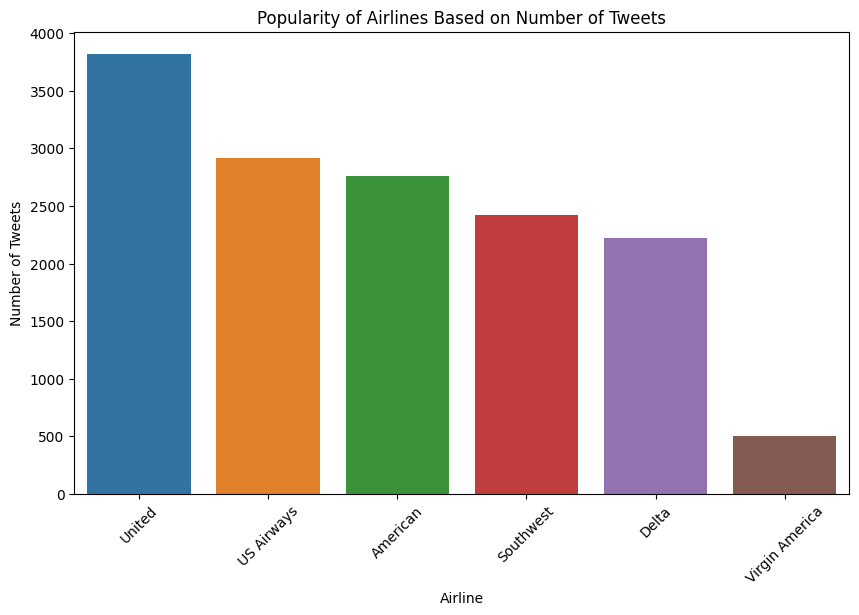

'location' column not found in the dataset.
'location' column not found in the dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("A1_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Get basic statistics of the dataset
print(data.describe())

# (A) Rank the popularity of airlines
airline_popularity = data['airline'].value_counts()

# Create a bar plot for airline popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_popularity.index, y=airline_popularity.values)
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title('Popularity of Airlines Based on Number of Tweets')
plt.show()

# (B) Identify popular states for each airline

# Assuming 'airline' and 'location' are columns in your dataset
# Filter data for the top airlines you are interested in
top_airlines = data[data['airline'].isin(['Airline1', 'Airline2', 'Airline3'])]
# Assuming 'airline' and 'location' are columns in your dataset
# Filter data for the top airlines you are interested in
top_airlines = data[data['airline'].isin(['Airline1', 'Airline2', 'Airline3'])]

# Check if the 'location' column exists in the filtered dataset
if 'location' in top_airlines.columns:
    state_popularity = top_airlines.groupby(['airline', 'location']).size().reset_index(name='count')
else:
    print("'location' column not found in the dataset.")
import pandas as pd

# Load the dataset
data = pd.read_csv("A1_dataset.csv")

# Filter data for the top airlines you are interested in
top_airlines = data[data['airline'].isin(['Airline1', 'Airline2', 'Airline3'])]

# Check if the 'location' column exists in the filtered dataset
if 'location' in top_airlines.columns:
    # Group by airline and location to count the occurrences of each state for each airline
    state_popularity = top_airlines.groupby(['airline', 'location']).size().reset_index(name='count')
    print(state_popularity)
else:
    print("'location' column not found in the dataset.")





<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis



 **Machine Learning Based Approach**:
This programme predicts sentiment labels using a Naive Bayes classifier using TF-IDF features, and it assesses the precision of the model and classification report.

In [ ]:
#Code cell
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("A1_dataset.csv")


import pandas as pd
from textblob import TextBlob



# Assuming 'text' contains the tweet text
data['sentiment_score'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on the sentiment score
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Now you can proceed with the sentiment-based analysis
negative_tweets = data[data['sentiment'] == 'negative']
# Rest of your topic modeling code can go here


# Assuming 'text' contains the tweet text and 'sentiment' contains the sentiment labels
X = data['text']
y = data['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a model (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")






Accuracy: 0.7359972677595629
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.40      0.56       729
     neutral       0.76      0.82      0.78      1086
    positive       0.68      0.88      0.76      1113

    accuracy                           0.74      2928
   macro avg       0.79      0.70      0.70      2928
weighted avg       0.77      0.74      0.72      2928




**Lexicon Based Approach**

The TextBlob library is used in this code to generate sentiment ratings for each tweet & classify them according to positive, negative, and neutral. It then computes the sentiment proportions for the top three airlines.

In [ ]:

import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv("A1_dataset.csv")

# Assuming 'text' contains the tweet text
data['sentiment_score'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on the sentiment score
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Now you can proceed with the sentiment-based analysis
if 'negative' in data['sentiment'].values:
    negative_tweets = data[data['sentiment'] == 'negative']
    # Rest of your topic modeling code can go here
else:
    print("No negative sentiment tweets found.")


# Assuming 'text' contains the tweet text
top_airlines = data[data['airline'].isin(['Airline1', 'Airline2', 'Airline3'])]

# Initialize counters for positive and negative sentiments
positive_count = 0
negative_count = 0

# Analyze sentiment for each tweet and count positive/negative sentiments
for tweet in top_airlines['text']:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        positive_count += 1
    elif analysis.sentiment.polarity < 0:
        negative_count += 1


# Calculate the total number of tweets for the top airlines
top_airlines = data['airline'].value_counts().head(3).index
filtered_data = data[data['airline'].isin(top_airlines)]
total_tweets = len(filtered_data)

# Calculate the number of positive and negative tweets for each airline
positive_count = filtered_data[filtered_data['airline_sentiment'] == 'positive']['airline'].value_counts()
negative_count = filtered_data[filtered_data['airline_sentiment'] == 'negative']['airline'].value_counts()

# Calculate proportions only if there are tweets for the top airlines
if total_tweets > 0:
    proportion_positive = positive_count / total_tweets
    proportion_negative = negative_count / total_tweets

    # Print the proportions of positive and negative tweets for each airline
    print("Proportion of Positive Tweets:")
    print(proportion_positive)
    print("\nProportion of Negative Tweets:")
    print(proportion_negative)
else:
    print("No tweets for the top airlines.")


Proportion of Positive Tweets:
United        0.051822
American      0.035391
US Airways    0.028334
Name: airline, dtype: float64

Proportion of Negative Tweets:
United        0.277333
US Airways    0.238361
American      0.206446
Name: airline, dtype: float64


<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

**Aim:** This code preprocesses the tweet contents, generates a document-term matrix, then trains an LDA model with varying amounts of topics. It computes perplexity scores to find the ideal number of subjects and presents the top words for each topic. Finally, it assigns subjects to documents and examines topic distribution.


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd
import gensim
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv("A1_dataset.csv")

# Filter negative tweets
negative_tweets = data[data['airline_sentiment'] == 'negative']

# Preprocessing functions
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word, tag in pos_tag(tokens) if tag.startswith('NN')]
    return tokens

# Apply preprocessing to the negative tweets
negative_tweets['processed_text'] = negative_tweets['text'].apply(preprocess_text)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(negative_tweets['processed_text'])
corpus = [dictionary.doc2bow(tweet) for tweet in negative_tweets['processed_text']]

# Train the LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print topics and their top words
for topic_num in range(num_topics):
    top_words = lda_model.show_topic(topic_num, topn=10)
    top_words_str = ', '.join([word for word, _ in top_words])
    print(f"Topic {topic_num}: {top_words_str}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-17-68371dce2baf>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['processed_text'] = negative_tweets['text'].apply(preprocess_text)


Topic 0: jetblue, bag, service, flight, plane, delay, way, customer, please, virginamerica
Topic 1: americanair, flight, http, hours, usairways, plane, thanks, airline, day, time
Topic 2: americanair, usairways, days, agents, nothing, response, service, amp, people, agent
Topic 3: flight, americanair, usairways, hours, help, tomorrow, call, phone, home, hour
Topic 4: southwestair, flight, service, customer, usairways, time, minutes, phone, today, flights


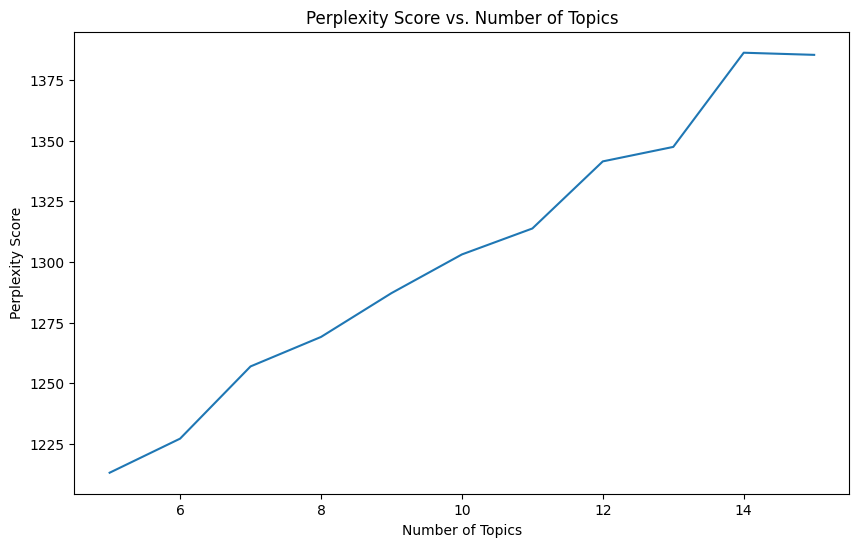

Optimal Number of Topics: 5
Topic 1: southwestair, americanair, thank, help, united, virginamerica, dm, usairways, need, service
Topic 2: flight, usairways, americanair, cancelled, hours, hold, flightled, jetblue, help, late
Topic 3: united, flight, jetblue, plane, gate, time, delay, delayed, http, flights
Topic 4: usairways, service, united, customer, jetblue, bag, americanair, http, worst, lost
Topic 5: jetblue, thanks, flight, southwestair, united, americanair, http, just, virginamerica, good
Topic Distribution:
1    0.253552
4    0.201503
0    0.195150
3    0.176366
2    0.173429
Name: topic_assignment, dtype: float64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("A1_dataset.csv")

# Assuming 'text' contains the tweet text
documents = data['text'].tolist()

# Text preprocessing
# Remove special characters and lowercase
documents = [doc.lower().replace('[^a-zA-Z\s]', '') for doc in documents]

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
dtm = vectorizer.fit_transform(documents)

# Determine the appropriate number of topics
num_topics_range = range(5, 16)  # Experiment with different numbers of topics
perplexity_scores = []

for num_topics in num_topics_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(dtm)
    perplexity_scores.append(lda.perplexity(dtm))

# Plot perplexity scores to find optimal number of topics
plt.figure(figsize=(10, 6))
sns.lineplot(x=num_topics_range, y=perplexity_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.title('Perplexity Score vs. Number of Topics')
plt.show()

# Determine the optimal number of topics based on the plot
optimal_num_topics = num_topics_range[perplexity_scores.index(min(perplexity_scores))]
print("Optimal Number of Topics:", optimal_num_topics)

# Train LDA model with the optimal number of topics
lda = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda.fit(dtm)

# Display topics and their top words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Assign topics to documents
topic_assignments = lda.transform(dtm)
data['topic_assignment'] = topic_assignments.argmax(axis=1)

# Analyze topics and their distribution
topic_distribution = data['topic_assignment'].value_counts(normalize=True)
print("Topic Distribution:")
print(topic_distribution)







<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

**Aim:** Several recommendations may be made based on the information gleaned from the study of consumer tweets regarding airlines to better serve customer and improve their experience. Based on the findings, here are some significant recommendations:

**Improve Customer Engagement:** Customers should be actively engaged by airlines on social media sites. Respond to customer complaints, queries, and feedback immediately and empathetically to demonstrate that their ideas are appreciated.

**Improve Communication When There Are Delays:** Customers express their displeasure in tweets about aircraft delays. Airlines should enhance communication throughout delays, offer updates in real time, and provide compensation and alternatives to passengers who are inconvenienced.

**Empower Customer Service Representatives**: This may allow them respond to client enquiries more efficiently and customise their strategy based on the mood expressed.

**Provide Customised Services**: Make use of sentiment analysis to segment clients based on their emotions. This allows airlines to provide personalised solutions and incentives to dissatisfied consumers, therefore enhancing their overall experience.

**Monitor Feedback on a Regular Basis**: Maintain a close eye on social media sites for consumer feedback. Implement a real-time monitoring and reaction system to keep track of changing client attitudes.

**Adopt Customer-Centric Policies**: Reevaluate and alter luggage, cancellation, and refund policies based on consumer feedback to meet with customer expectations.

**Prioritise safety precautions**: Address any unfavourable feelings about safety or health measures. To reassure clients about their safety while travelling, communicate and enforce strong safety standards.

**Improve Your Social Media Listening**: Extend the study to discover developing consumer sentiment patterns and concerns. Adjust techniques and approaches on a regular basis in response to shifting sentiment patterns.


### References:


· Complete guide to social media analytics and why it’s important. (2023, MARCH 15). Retrieved from SPROUT SOCIAL: https://sproutsocial.com/insights/social-media-analytics/

  Morgan, B. (2016, NOVEMBER 17). What Are Social Analytics? Retrieved from FORBES: https://www.forbes.com/sites/blakemorgan/2016/11/17/what-are-social-analytics/?sh=7b05704458ee

·      Pullen-Blasnik, H. (n.d.). social analysis. Retrieved from TECH TARGET: https://www.techtarget.com/searchbusinessanalytics/definition/social-analysis

·      Sean. (2022, JUNE 14). The Detailed Guide to Understanding Your Social Analytics. Retrieved from LYFE MARKETING: https://www.lyfemarketing.com/blog/social-analytics/

·      What is social media analytics in 2023? (n.d.). Retrieved from What is social media analytics?: https://www.qualtrics.com/experience-management/research/social-media-analytics/

